In [245]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms.v2 as transforms

In [246]:
# HYPER PARAMETERS ---

epochs = 20
batch_size = 32
learning_rate = 0.0001

In [247]:
transform = transforms.Compose([
  transforms.Resize((224, 224)),
  # transforms.Grayscale(),
  transforms.ToImage(),
  transforms.ToDtype(torch.float32),
  transforms.Lambda(lambda x: x / 255)
])

target_transform = transforms.Compose([
  transforms.Lambda(lambda t: F.one_hot(torch.Tensor([t]).type(torch.long), 2)[0]),
  transforms.ToDtype(torch.float32)
])

dataset = datasets.ImageFolder('./datasets/pizza-not-pizza', transform, target_transform)
train, validation, test = data.random_split(dataset, [.7, .2, .1])

train_loader = data.DataLoader(train, batch_size, shuffle=True)
validation_loader = data.DataLoader(train, batch_size)
test_loader = data.DataLoader(train, batch_size)

In [248]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.ZeroPad2d(3),
      nn.Conv2d(3, 32, 7),
      nn.BatchNorm2d(32),
      nn.MaxPool2d(2),

      nn.Flatten(),
      nn.Linear(401408, 2),
      nn.Sigmoid()
    )

  def forward(self, x):
    return self.layers(x)
  
model = Model()
model

Model(
  (layers): Sequential(
    (0): ZeroPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=401408, out_features=2, bias=True)
    (6): Sigmoid()
  )
)

In [249]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for i, (x, t) in enumerate(train_loader):
    optimizer.zero_grad()
    y = model(x)
    loss_train = criterion(y, t)
    loss_train.backward()
    optimizer.step()

    # for x, t in validation_loader:
    #   y = model(x)
    #   loss_validation = criterion(y, t)

    print(f"Epoch #{epoch}, Batch #{i}, Train Loss: {loss_train.item():.4f}")

Epoch #0, Batch #0, Train Loss: 0.6624
Epoch #0, Batch #1, Train Loss: 0.5841
Epoch #0, Batch #2, Train Loss: 0.6490
Epoch #0, Batch #3, Train Loss: 0.6958
Epoch #0, Batch #4, Train Loss: 0.6605
Epoch #0, Batch #5, Train Loss: 0.4994
Epoch #0, Batch #6, Train Loss: 0.8274
Epoch #0, Batch #7, Train Loss: 0.5591
Epoch #0, Batch #8, Train Loss: 0.5436
Epoch #0, Batch #9, Train Loss: 0.5485
Epoch #0, Batch #10, Train Loss: 0.6955
Epoch #0, Batch #11, Train Loss: 0.6845
Epoch #0, Batch #12, Train Loss: 0.7048
Epoch #0, Batch #13, Train Loss: 0.8194
Epoch #0, Batch #14, Train Loss: 0.6318
Epoch #0, Batch #15, Train Loss: 0.5977
Epoch #0, Batch #16, Train Loss: 0.6104
Epoch #0, Batch #17, Train Loss: 0.7447
Epoch #0, Batch #18, Train Loss: 0.7906
Epoch #0, Batch #19, Train Loss: 0.6989
Epoch #0, Batch #20, Train Loss: 0.7091
Epoch #0, Batch #21, Train Loss: 0.6519
Epoch #0, Batch #22, Train Loss: 0.7220
Epoch #0, Batch #23, Train Loss: 0.7262
Epoch #0, Batch #24, Train Loss: 0.4944
Epoch #0, 

In [250]:
model.eval()
total = 0
correct = 0

for x, t in test_loader:
  y = model(x)
  y = torch.argmax(y, dim=1)
  t = torch.argmax(t, dim=1)

  total += t.size(0)
  correct += (y == t).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 82.57%


Actual: Pizza, Predict: Pizza, Correct: True


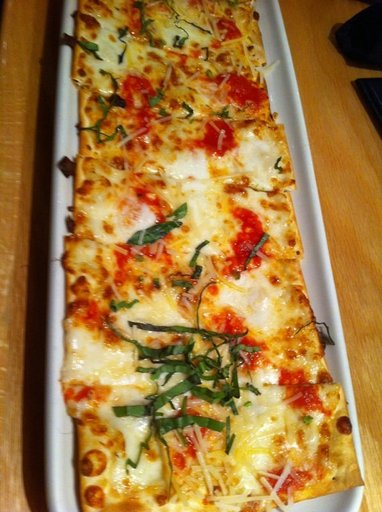

In [276]:
model.eval()


prev = datasets.ImageFolder('./datasets/pizza-not-pizza')

n = torch.randint(0, 2000, (1,))
x = dataset[n][0]
y = model(x.reshape(1, 3, 224, 224))
t = dataset[n][1]

y=torch.argmax(y)
t=torch.argmax(t)

label=['Not_Pizza', 'Pizza']

print(f"Actual: {label[t]}, Predict: {label[y]}, Correct: {y == t}")
prev[n][0]